In [1]:
import pandas as pd
import datetime as dt

In [2]:
chase = pd.DataFrame()
#set up empty dataframe

In [3]:
files = ["Chase_202101.xlsx", "Chase_202102.xlsx",  "Chase_202104.xlsx", "Chase_202105.xlsx","Chase_202106.xlsx","Chase_202103.xlsx","Chase_202112.xlsx","Chase_202012.xlsx", "Chase_202107.xlsx", "Chase_202108.xlsx",  "Chase_202109.xlsx", "Chase_202110.xlsx",  "Chase_202111.xlsx"]

In [4]:
for file in files:
    df = pd.read_excel(file)
    df["amount"] = abs(df["Amount"])
    #change the negative numbers in the excel file to positive ones.
    df["Year"] = pd.DatetimeIndex(df["Transaction Date"]).year
    #add a column of the year so that it is easy to sort based on time
    chase=chase.append(df, ignore_index=True)
chase.to_excel("chase_2021.xlsx", index=False, sheet_name="chase")

In [5]:
#sort all the transaction in 202
new_df=pd.read_excel("chase_2021.xlsx")

In [6]:
new_df.head

<bound method NDFrame.head of     Transaction Date  Post Date               Description           Category  \
0         2021-02-03 2021-02-04    WASH EYE PHY CHEV CHAS  Health & Wellness   
1         2021-02-03 2021-02-04    MCDONALD'S M5089 OF MD       Food & Drink   
2         2021-02-01 2021-02-02           KIDS ADVENTURES           Personal   
3         2021-01-28 2021-01-29     WALTER REED CAFE 8901  Bills & Utilities   
4         2021-01-26 2021-01-27  LOUDOUN MEDICAL GROUP PC  Health & Wellness   
..               ...        ...                       ...                ...   
523       2021-11-08 2021-11-10     WALTER REED CAFE 8901  Bills & Utilities   
524       2021-11-07 2021-11-09  CAVA MEZZE GRILL MONTGOM       Food & Drink   
525       2021-11-07 2021-11-07              BOOST MOBILE  Bills & Utilities   
526       2021-11-04 2021-11-05         MCDONALD'S F37184       Food & Drink   
527       2021-11-04 2021-11-05     WALTER REED CAFE 8901  Bills & Utilities   

     Type

In [20]:
df=new_df.loc[new_df["Year"]==2021]

In [24]:
walter= df.loc[df["Description"].str.contains("WALTER")].count()[0]

In [28]:
pizza=df.loc[df["Description"].str.contains("POTOMAC")].count()[0]

df.loc[df["Description"].str.contains("MCDONALD")]

In [31]:
mc=df.loc[df["Description"].str.contains("MCDONALD")].count()[0]

In [33]:
import numpy as np
import matplotlib.pyplot as plt

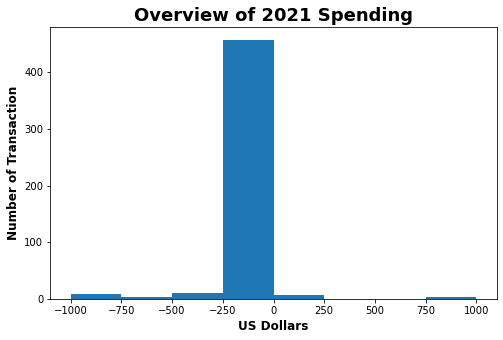

In [44]:
plt.figure(figsize=(8,5))
plt.title("Overview of 2021 Spending", fontdict={"fontweight":"bold", "fontsize":18})

bins = [-1000, -750, -500, -250, 0, 250, 500, 750, 1000]
plt.hist(df.Amount, bins=bins)
plt.xlabel("US Dollars",fontdict={"fontweight":"bold", "fontsize":12})
plt.ylabel("Number of Transaction", fontdict={"fontweight":"bold", "fontsize":12})

plt.savefig("Chase_histgraph.png", dpi=300)

plt.show()

In [45]:
labels=["Walter Cafe", "Potomac Pizza", "MCDONALD"]

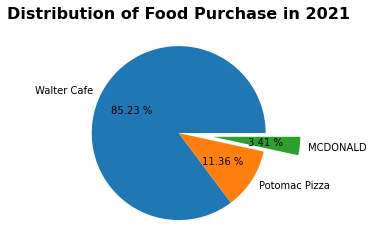

In [50]:
plt.title("Distribution of Food Purchase in 2021",fontdict={"fontweight":"bold", "fontsize":16})

explode=[0, 0, .4]

plt.pie([walter, pizza, mc], labels = labels, autopct = "%.2f %%", explode = explode)

plt.savefig("Chase_piechart.png", dpi=300)
plt.show()

In [51]:
A_walter= df.loc[df["Description"].str.contains("WALTER")].amount
A_pizza=df.loc[df["Description"].str.contains("POTOMAC")].amount
A_mc=df.loc[df["Description"].str.contains("MCDONALD")].amount

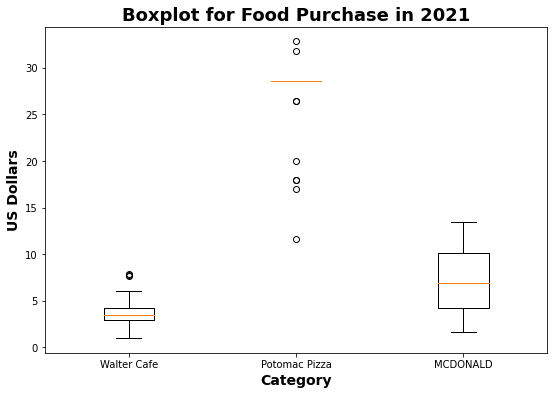

In [55]:
plt.figure(figsize=(9, 6))
plt.title("Boxplot for Food Purchase in 2021",fontdict={"fontweight":"bold", "fontsize":18})

plt.boxplot([A_walter, A_pizza, A_mc], labels=labels)

plt.xlabel("Category", fontdict={"fontweight":"bold", "fontsize":14})
plt.ylabel("US Dollars", fontdict={"fontweight":"bold", "fontsize":14})

plt.savefig("Boxplot for Food in 2021", dpi=300)
plt.show()


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("gas_prices.csv")

In [3]:
df.head

<bound method NDFrame.head of     Year  Australia  Canada  France  Germany  Italy  Japan  Mexico  \
0   1990        NaN    1.87    3.63     2.65   4.59   3.16    1.00   
1   1991       1.96    1.92    3.45     2.90   4.50   3.46    1.30   
2   1992       1.89    1.73    3.56     3.27   4.53   3.58    1.50   
3   1993       1.73    1.57    3.41     3.07   3.68   4.16    1.56   
4   1994       1.84    1.45    3.59     3.52   3.70   4.36    1.48   
5   1995       1.95    1.53    4.26     3.96   4.00   4.43    1.11   
6   1996       2.12    1.61    4.41     3.94   4.39   3.64    1.25   
7   1997       2.05    1.62    4.00     3.53   4.07   3.26    1.47   
8   1998       1.63    1.38    3.87     3.34   3.84   2.82    1.49   
9   1999       1.72    1.52    3.85     3.42   3.87   3.27    1.79   
10  2000       1.94    1.86    3.80     3.45   3.77   3.65    2.01   
11  2001       1.71    1.72    3.51     3.40   3.57   3.27    2.20   
12  2002       1.76    1.69    3.62     3.67   3.74   3.15  

In [4]:
import numpy as np
import matplotlib.pyplot as plt

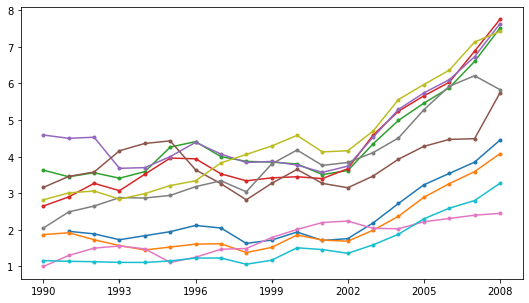

In [19]:
plt.figure(figsize=(9,5))

plt.title("Gas Prices in Countir")
for country in df:
    if country != "Year":
        plt.plot(df.Year, df[country], marker=".")
#plt.plot(df.Year, df.USA,"r.-")
#plt.plot(df.Year, df.Canada, "b.-")
plt.xticks(df.Year[::3])

#plt.legend()
plt.show()